In [140]:

import pandas as pd
import numpy as np
import re
import scipy.stats as stats
import matplotlib.pyplot as plt
from matplotlib import rcParams 
rcParams['figure.figsize'] = [20, 10]

In [77]:
gen_conditions = [
    (atus_data['birth_year'] >= 1946) & (atus_data['birth_year'] <= 1964),
    (atus_data['birth_year'] >= 1965) & (atus_data['birth_year'] <= 1980),
    (atus_data['birth_year'] >= 1981) & (atus_data['birth_year'] <= 1996),
    (atus_data['birth_year'] >= 1997) & (atus_data['birth_year'] <= 2012)
                 ]
gen_choices = [
    "Boomers",
    "Generation X",
    "Millennials",
    "Generation Z"
]
atus_data['generation'] = np.select(gen_conditions, gen_choices, default = 'Silent Generation')
sex_conditions = [
    (atus_data['TESEX'] == 1),
    (atus_data['TESEX'] == 2)
                 ]
sex_choices = [
    "Male",
    "Female"
]
atus_data['Sex'] = np.select(sex_conditions, sex_choices)


In [85]:
re.search('t0101.*', column)

TypeError: expected string or bytes-like object

In [105]:
sleep_cols = list(atus_data.columns[[bool(re.search('t0101.*', column)) for column in atus_data.columns]])
house_work_cols = list(atus_data.columns[[bool(re.search('t02.*', column)) for column in atus_data.columns]])
child_care_cols = (list(atus_data.columns[[bool(re.search('t0301.*', column)) for column in atus_data.columns]]) + 
              list(atus_data.columns[[bool(re.search('t0302.*', column)) for column in atus_data.columns]]) +
              list(atus_data.columns[[bool(re.search('t0303.*', column)) for column in atus_data.columns]]))
work_cols = list(atus_data.columns[[bool(re.search('t05.*', column)) for column in atus_data.columns]])
education_cols = list(atus_data.columns[[bool(re.search('t06.*', column)) for column in atus_data.columns]])
leisure_cols = (list(atus_data.columns[[bool(re.search('t12.*', column)) for column in atus_data.columns]]) + 
           list(atus_data.columns[[bool(re.search('t13.*', column)) for column in atus_data.columns]]))
atus_data['sleep'] = atus_data[sleep_cols].sum(axis = 1)/60
atus_data['house_work'] = atus_data[house_work_cols].sum(axis = 1)/60
atus_data['child_care'] = atus_data[child_care_cols].sum(axis = 1)/60
atus_data['work'] = atus_data[work_cols].sum(axis = 1)/60
atus_data['education'] = atus_data[education_cols].sum(axis = 1)/60
atus_data['leisure'] = atus_data[leisure_cols].sum(axis = 1)/60




In [92]:
atus_data.columns[sleep_cols]

Index(['t010101', 't010102', 't010199'], dtype='object')

In [113]:
worker = atus_data[(atus_data.TELFS == 1) & (atus_data.TEAGE >= 30) & (atus_data.TEAGE <= 50)]
worker

,TUCASEID,GEMETSTA,GTMETSTA,PEEDUCA,PEHSPNON,PTDTRACE,TEAGE,TELFS,TEMJOT,TESCHENR,...,year,birth_year,generation,Sex,sleep,house_work,child_care,work,education,leisure
1,20030100013344,2,-1,40,2,1,41,1,2,2,...,2003,1962,Boomers,Female,10.333333,0.000000,1.000000,0.000000,0.0,9.833333
6,20030100014209,1,-1,39,2,1,44,1,2,2,...,2003,1959,Boomers,Female,8.850000,1.416667,1.633333,8.566667,0.0,0.000000
8,20030100014550,2,-1,41,2,1,33,1,2,2,...,2003,1970,Generation X,Female,10.750000,6.333333,0.000000,0.000000,0.0,2.000000
9,20030100014758,1,-1,41,2,2,39,1,2,2,...,2003,1964,Boomers,Female,3.000000,2.333333,1.333333,4.433333,0.0,8.450000
11,20030100015106,1,-1,40,2,1,33,1,2,2,...,2003,1970,Generation X,Female,9.583333,0.833333,1.000000,0.000000,0.0,2.916667
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
210566,20191212191972,-1,1,40,2,2,39,1,1,2,...,2019,1980,Generation X,Female,6.966667,3.000000,0.000000,0.000000,0.0,6.750000
210571,20191212192090,-1,1,45,2,1,33,1,2,2,...,2019,1986,Millennials,Male,8.416667,1.000000,0.000000,0.500000,0.0,10.000000
210580,20191212192214,-1,1,43,2,1,47,1,2,2,...,2019,1972,Generation X,Female,5.500000,2.583333,0.000000,0.000000,0.0,14.700000
210582,20191212192255,-1,2,43,2,1,41,1,2,2,...,2019,1978,Generation X,Female,10.333333,2.000000,0.000000,0.000000,0.0,7.083333


In [122]:
generation_worker_df = worker.groupby('generation').agg({'sleep':'mean','house_work':'mean','child_care':'mean','work':'mean','education':'mean','leisure':'mean'}).reset_index()
generation_worker_df



,generation,sleep,house_work,child_care,work,education,leisure
0,Boomers,8.316151,2.019302,0.481549,4.552851,0.072001,4.071072
1,Generation X,8.519482,1.769911,0.876428,4.438592,0.087745,3.960035
2,Millennials,8.710442,1.636718,1.060640,4.425084,0.124155,3.909304


In [134]:
stats.f_oneway(worker[worker.generation=="Boomers"]['work'], worker[worker.generation=="Generation X"]['work'], worker[worker.generation=="Millennials"]['work'])


F_onewayResult(statistic=4.4290822816998245, pvalue=0.011928948236594687)

In [121]:
sex_separated_generation_worker_df = worker.groupby(['generation','Sex']).agg({'sleep':'mean','house_work':'mean','child_care':'mean','work':'mean','education':'mean','leisure':'mean'}).reset_index()
sex_separated_generation_worker_df



,generation,Sex,sleep,house_work,child_care,work,education,leisure
0,Boomers,Female,8.402088,2.404180,0.530667,4.048622,0.091288,3.777229
1,Boomers,Male,8.229637,1.631842,0.432101,5.060463,0.052583,4.366887
2,Generation X,Female,8.616978,2.129624,1.035549,3.949770,0.108110,3.612495
3,Generation X,Male,8.424699,1.420207,0.721734,4.913815,0.067947,4.297905
4,Millennials,Female,8.836056,1.906712,1.304196,4.044411,0.124211,3.464701
5,Millennials,Male,8.587942,1.373419,0.823125,4.796316,0.124101,4.342881


In [135]:
stats.ttest_ind(worker[(worker.generation=="Boomers") & (worker.Sex=="Male")]['work'], worker[(worker.generation=="Boomers") & (worker.Sex=="Female")]['work'], equal_var=False)



Ttest_indResult(statistic=15.135526079906068, pvalue=2.0000787466363792e-51)

In [137]:
stats.ttest_ind(worker[(worker.generation=="Generation X") & (worker.Sex=="Male")]['work'], worker[(worker.generation=="Generation X") & (worker.Sex=="Female")]['work'], equal_var=False)


Ttest_indResult(statistic=22.473656604308026, pvalue=3.391087471859668e-111)

In [138]:
stats.ttest_ind(worker[(worker.generation=="Millennials") & (worker.Sex=="Male")]['work'], worker[(worker.generation=="Millennials") & (worker.Sex=="Female")]['work'], equal_var=False)


Ttest_indResult(statistic=6.860268263975352, pvalue=7.524191495722495e-12)

In [149]:
generation_worker_df[generation_worker_df.generation == 'Generation X']['house_work']

1    1.769911
Name: house_work, dtype: float64

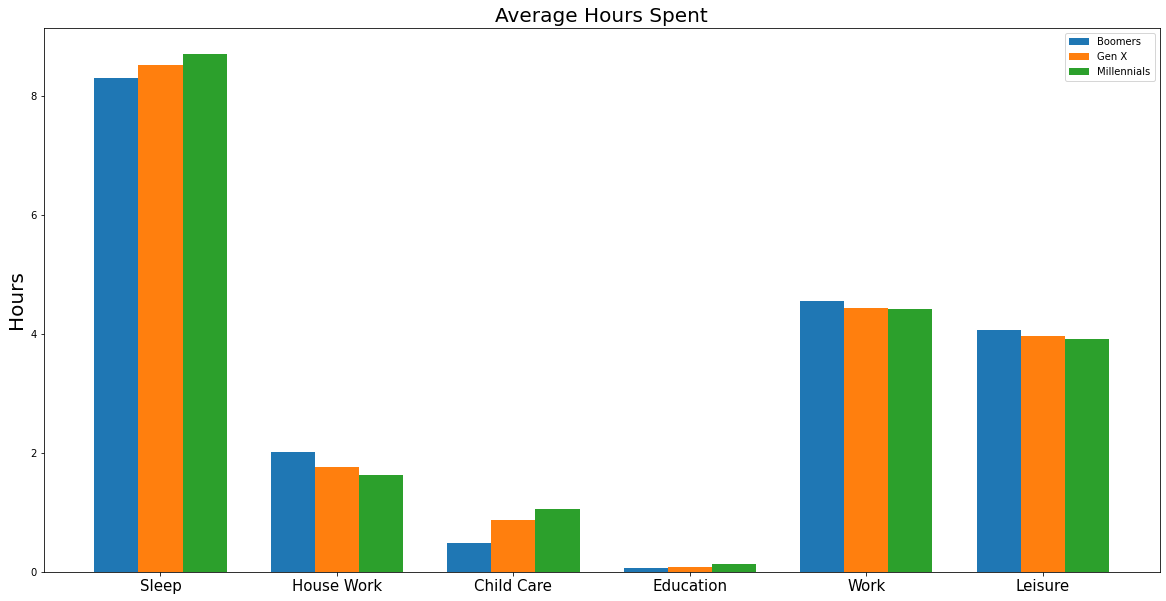

In [162]:
N = 6
Boomer_means = [generation_worker_df[generation_worker_df.generation == 'Boomers']['sleep'][0], 
                generation_worker_df[generation_worker_df.generation == 'Boomers']['house_work'][0],
                generation_worker_df[generation_worker_df.generation == 'Boomers']['child_care'][0],
                generation_worker_df[generation_worker_df.generation == 'Boomers']['education'][0],
                generation_worker_df[generation_worker_df.generation == 'Boomers']['work'][0],
                generation_worker_df[generation_worker_df.generation == 'Boomers']['leisure'][0]
               ]
genx_means = [generation_worker_df[generation_worker_df.generation == 'Generation X']['sleep'][1], 
                generation_worker_df[generation_worker_df.generation == 'Generation X']['house_work'][1],
                generation_worker_df[generation_worker_df.generation == 'Generation X']['child_care'][1],
                generation_worker_df[generation_worker_df.generation == 'Generation X']['education'][1],
                generation_worker_df[generation_worker_df.generation == 'Generation X']['work'][1],
                generation_worker_df[generation_worker_df.generation == 'Generation X']['leisure'][1]
               ]
millennials_means = [generation_worker_df[generation_worker_df.generation == 'Millennials']['sleep'][2], 
                generation_worker_df[generation_worker_df.generation == 'Millennials']['house_work'][2],
                generation_worker_df[generation_worker_df.generation == 'Millennials']['child_care'][2],
                generation_worker_df[generation_worker_df.generation == 'Millennials']['education'][2],
                generation_worker_df[generation_worker_df.generation == 'Millennials']['work'][2],
                generation_worker_df[generation_worker_df.generation == 'Millennials']['leisure'][2]
               ]

ind = np.arange(N) 
width = 0.25       
plt.bar(ind, Boomer_means, width, label='Boomers')
plt.bar(ind + width, genx_means, width,label='Gen X')
plt.bar(ind + 2* width, millennials_means, width, label='Millennials')
plt.ylabel('Hours', fontdict={'fontsize':20})
plt.title('Average Hours Spent', fontdict={'fontsize':20})
plt.xticks(ind + width / 1, ('Sleep', 'House Work', 'Child Care', 'Education', 'Work', 'Leisure'), fontsize=15)
plt.legend(loc='best')
plt.show()


In [163]:
stats.f_oneway(worker[worker.generation=="Boomers"]['work'], worker[worker.generation=="Generation X"]['work'], worker[worker.generation=="Millennials"]['work'])


F_onewayResult(statistic=4.4290822816998245, pvalue=0.011928948236594687)

In [133]:
np.mean(worker[worker.generation=="Millennials"]['work'])

4.425083699518738

In [ ]:
worker.loc[worker., 'COL_NAME'] = x

In [41]:
for i in atus_data.columns:
    print(i)

TUCASEID
GEMETSTA
GTMETSTA
PEEDUCA
PEHSPNON
PTDTRACE
TEAGE
TELFS
TEMJOT
TESCHENR
TESCHLVL
TESEX
TESPEMPNOT
TRCHILDNUM
TRDPFTPT
TRERNWA
TRHOLIDAY
TRSPFTPT
TRSPPRES
TRYHHCHILD
TUDIARYDAY
TUFNWGTP
TEHRUSLT
TUYEAR
t010101
t010102
t010199
t010201
t010299
t010301
t010399
t010401
t010499
t010501
t010599
t019999
t020101
t020102
t020103
t020104
t020199
t020201
t020202
t020203
t020299
t020301
t020302
t020303
t020399
t020401
t020402
t020499
t020501
t020502
t020599
t020681
t020699
t020701
t020799
t020801
t020899
t020901
t020902
t020903
t020904
t020905
t020999
t029999
t030101
t030102
t030103
t030104
t030105
t030108
t030109
t030110
t030111
t030112
t030186
t030199
t030201
t030202
t030203
t030204
t030299
t030301
t030302
t030303
t030399
t030401
t030402
t030403
t030404
t030405
t030499
t030501
t030502
t030503
t030504
t030599
t039999
t040101
t040102
t040103
t040104
t040105
t040108
t040109
t040110
t040111
t040112
t040186
t040199
t040201
t040202
t040203
t040204
t040299
t040301
t040302
t040303
t040399
t04040

In [43]:
atus_data.TESCHENR.unique()

array([-1,  2,  1, -3])

In [ ]:
# Strips the newline character 
for line in Lines: 
    print("Line{}: {}".format(count, line.strip())) 
